Практический проект по построению системы поиска аномалий.
Цель: В этом домашнем задании вам предстоит настроить систему по поиску аномалий в банковских транзакциях. Мало того, что аномальных значений в данных меньше одного процента, так еще и переменные анонимизированы и представляют собой первые 28 главных компонент, полученных после PCA преобразования оригинальных данных (о которых мы ничего не знаем). Смогут ли бравые unsupervised методы справится с такой задачей? Можно ли работать в таких условиях? Кто подставил кролика Роджера? Ответы на некоторые их этих вопросов вы узнаете после выполнения задания :)

1. Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud #creditcard.csv

2. Проведите небольшой EDA (гистограммы и описательные статистики - обязательно)

3. Воспользуйтесь процентом аномалий, посчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета

4. Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров

5. Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают

6. При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек
Критерии оценки: Настроены и построены модели и методы, разобранные на занятии - 6 баллов

Посчитаны метрики и дана оценка качества работы алгоритмов - 2 балла

Визуализация работы алгоритмов при помощи tSNE/UMAP - 2 балла

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('creditcard.csv', sep=',')

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

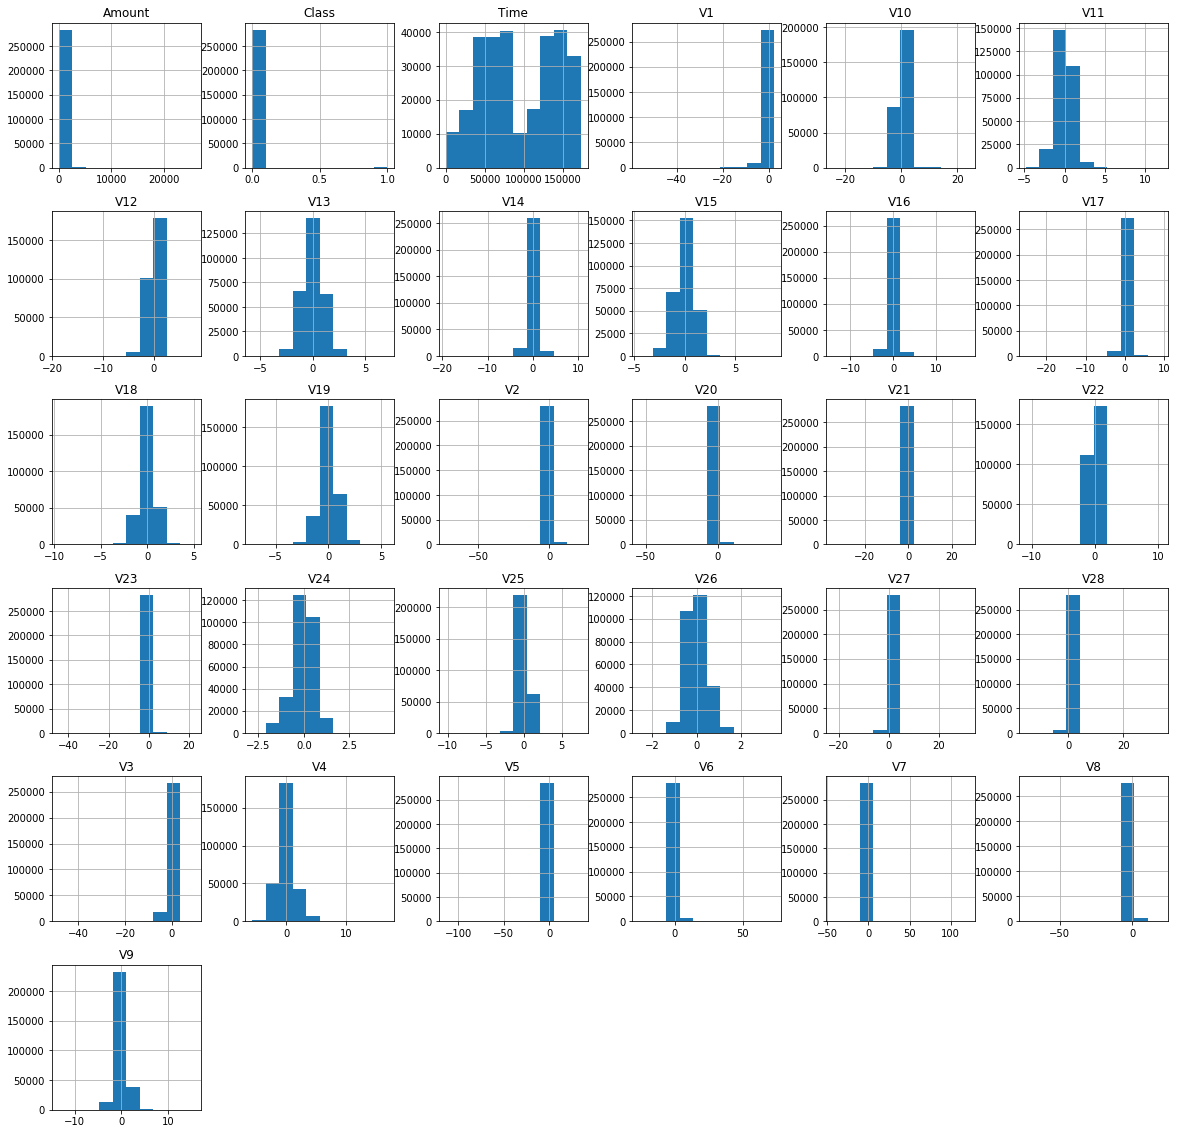

In [5]:
data.hist(figsize=(20, 20));

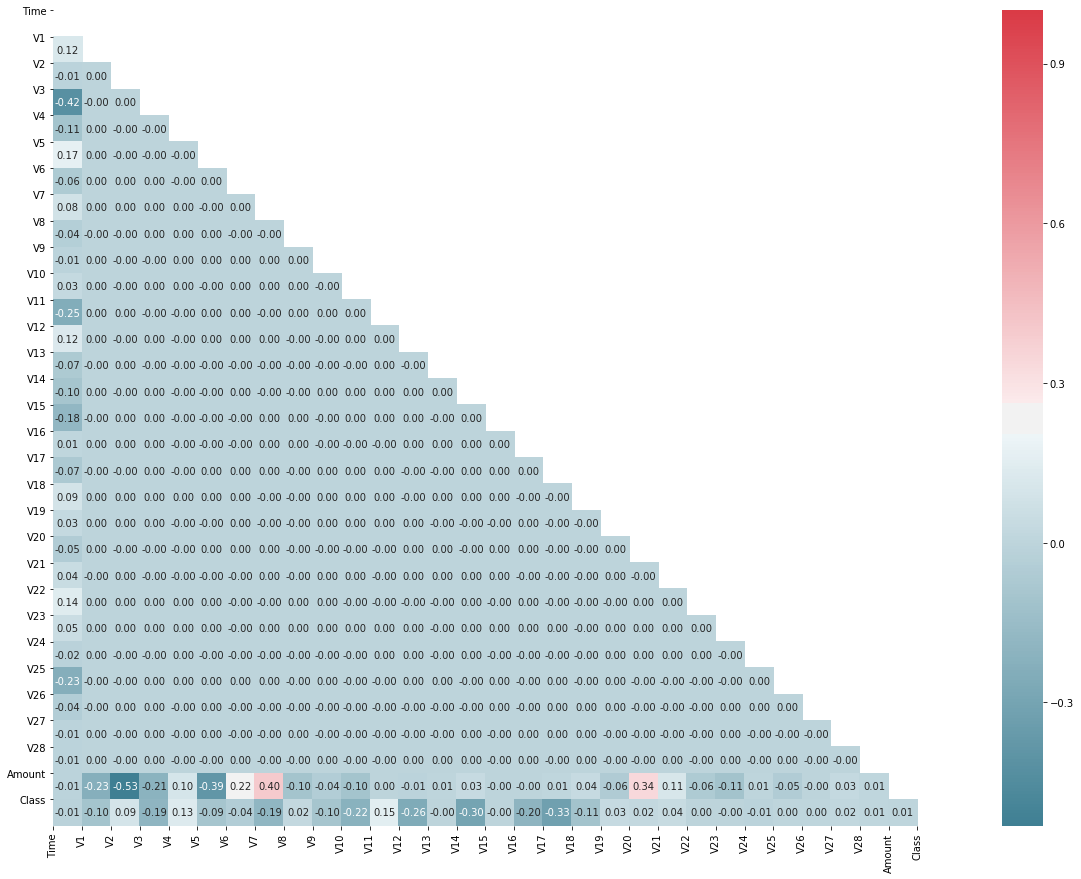

In [6]:
#heatmap- типичненькое изображание корреляции между переменными
corrmap = data.corr()

mask = np.zeros_like(corrmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmap, mask = mask, cmap=cmap, annot=True, fmt=".2f")
plt.xticks(range(len(corrmap.columns)), corrmap.columns);
plt.yticks(range(len(corrmap.columns)), corrmap.columns)
plt.show()

О данных, которые стоят за переменными V1,...,V28 можно только строить предположения.

Попробую.

С переменной Amount явно коррелируют:

V2 (-0,53) и V5 (-0,39) - размер комиссии за перевод? (если он фиксирован, а не в %)

V6 (0,40) и V20 (0,34) - сумма средств на счете? / комиссия за перевод (если в %)? /

In [7]:
print('Легальные сделки', round(data['Class'].value_counts()[0]/len(data) * 100,2), '%')
print('Фрод', round(data['Class'].value_counts()[1]/len(data) * 100,2), '%')

Легальные сделки 99.83 %
Фрод 0.17 %


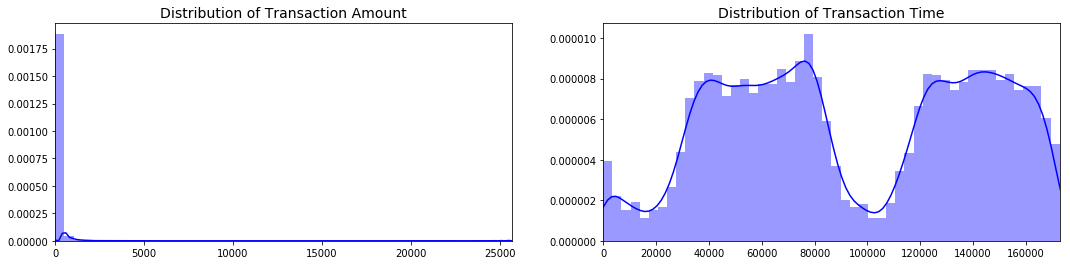

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='blue')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

У есть предположения по поводу распределения транзакций во времени. 
0 - это вероятнее всего 0 часов 0 минут. Скачок - списывание средств за мобильные банки (необязательно же транзакция ручная, верно?), автоматические платежи, пополнение баланса мобильных телефонов и тп.

С 30000 секунды начинается рабочий день. Это примерно ~ 8:30. Кофе, бензин, путь до работы, обед, другие нужды и пр.

С 80000 секунды заканчивается день, активности падают. Это примерно 22:30 виден резкий спад. Новый виток стартует в 110'000 - 120'000, что снова соответствует промежутку между ~8:00 и ~9:00 утра.

Получается, что мы имеем транзакции за два рабочих дня. К слову, можно предположить, что первый день - выходной, а вот второй - рабочий, т.к. в первый день виден явный вечерний "пик" затрат, что сродни развлечениям вечером в выходные.

Полагаю, что нам не важен факт "транзакция произошла на 80000 секунде с начала X", но важен факт, что транзакция произошла вечером\днем\утром и пр.

Посмотрим, кстати, как распределенены фродовые операции по времени.

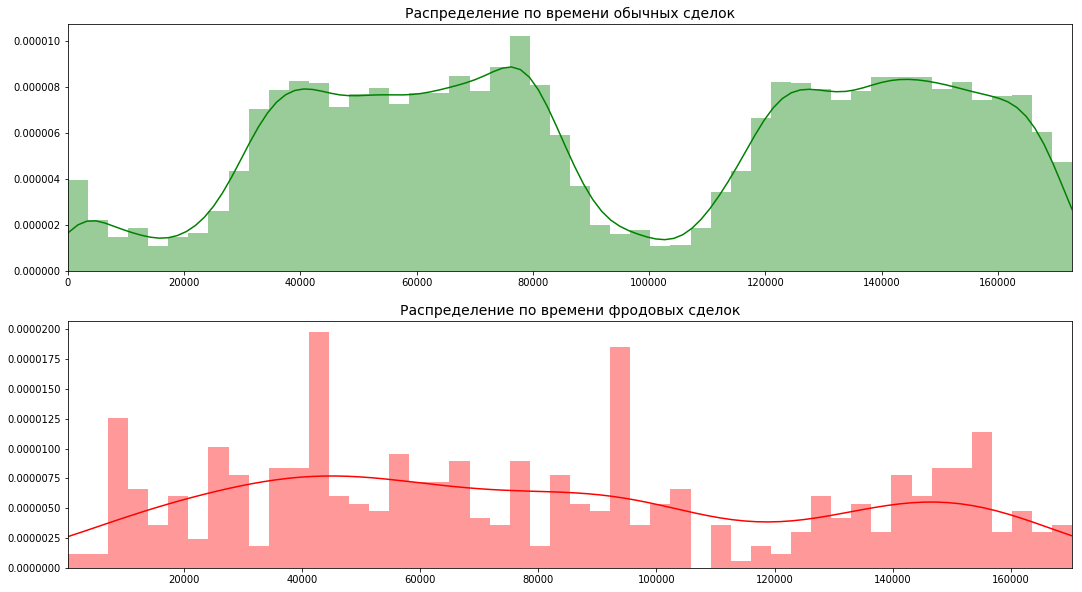

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(18,10))

amount_val = data['Time'][data['Class']==0].values
time_val = data['Time'][data['Class']==1].values

sns.distplot(data['Time'][data['Class']==0].values, bins = 50, ax=ax[0], color='green')
ax[0].set_title('Распределение по времени обычных сделок', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], bins = 50, color='red')
ax[1].set_title('Распределение по времени фродовых сделок', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [10]:
# Посмотрим, когда совершается последняя сделка из набора
print ('Вpемя совершения последней сделки: ' + str(data['Time'].max()))
print ('Для сравнения. Два дня в секундах - это: ' + str(2*24*60*60))

Вpемя совершения последней сделки: 172792.0
Для сравнения. Два дня в секундах - это: 172800


In [11]:
# Обработаем данные. Во-первых, время платежа поделим на категории: утро, день, вечер, ночь. Каждая по 6 часов. 
# Дни совершения платежа также создадим метку (бинарная переменная - первый день или второй)

# 1 - выходной, 0 - будний день. 
data['Day'] = np.where(data['Time']<86400,1,0)

# время дня 
conditions = [
    ((data['Time']<25200)|((data['Time']>=(24*3600))&(data['Time']<31*3600))), 
    ((data['Time']>= (7*3600))&(data['Time']<(12*3600)))|((data['Time']>=(31*3600))&(data['Time']<(36*3600))),
    ((data['Time']>=(12*3600))&(data['Time']<(19*3600)))|((data['Time']>=(36*3600))&(data['Time']<(43*3600))),
    ((data['Time']>=(19*3600))&(data['Time']<(24*3600)))|((data['Time']>=(43*3600))&(data['Time']<(48*3600)))]
part_of_day = ['night', 'morning', 'afternoon', 'evening']

data['Part of day'] = np.select(conditions, part_of_day)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Day,Part of day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,night
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,night
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,night
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,night
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,night


In [12]:
data[['Part of day', 'Class', 'V1']].groupby([ 'Class','Part of day']).count()

V1
Class Part of day        
0     afternoon    113307
      evening       76404
      morning       66702
      night         27902
1     afternoon       167
      evening          83
      morning         109
      night           133

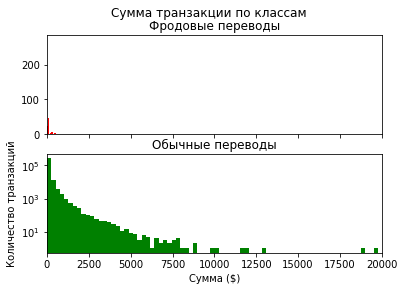

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Сумма транзакции по классам')
bins = 100

ax1.hist(data['Amount'][data['Class'] == 1], bins = bins, color = 'red')
ax1.set_title('Фродовые переводы')

ax2.hist(data['Amount'][data['Class'] == 0], bins = bins, color = 'green')
ax2.set_title('Обычные переводы')

plt.xlabel('Сумма ($)')
plt.ylabel('Количество транзакций')
plt.xlim((0, 20000))
#Используем логарифмическую шкалу для лучшей визуализации
plt.yscale('log')
plt.show();

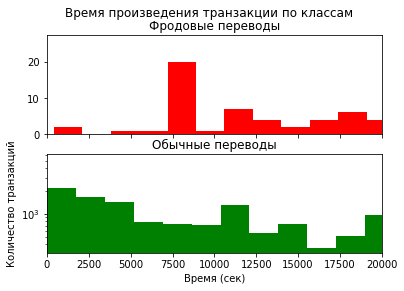

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Время произведения транзакции по классам')
bins = 100

ax1.hist(data['Time'][data['Class'] == 1], bins = bins, color = 'red')
ax1.set_title('Фродовые переводы')

ax2.hist(data['Time'][data['Class'] == 0], bins = bins, color = 'green')
ax2.set_title('Обычные переводы')

plt.xlabel('Время (сек)')
plt.ylabel('Количество транзакций')
plt.xlim((0, 20000))
#Используем логарифмическую шкалу для лучшей визуализации
plt.yscale('log')
plt.show();

In [15]:
#Какова средняя сумма для обычных сделок и для мошеннических? 
print('Средняя сумма мошеннической транзакции: ' + str(data['Amount'][data['Class']==1].mean()))
print('Средняя сумма обычной транзакции: ' + str(data['Amount'][data['Class']==0].mean()))

Средняя сумма мошеннической транзакции: 122.21132113821133
Средняя сумма обычной транзакции: 88.29102242225574


Наши мошенники неплохо шифруются.

Несмотря на то, что средняя сумма транзации у них выше, переводы делаются мелкими суммами.

In [16]:
#Откуда взялись сделки с мнимальной суммой = 0? -- Возможно ли что это технические опперации? Перепривязка номера телефона и пр операции, которые предшествовали переводу средств?
#Сколько их всего? Есть ли среди них мошеннические? 
print('Всего сделок с нулевой суммой транзакции: ' + str(len(data[data['Amount']==0.0])))
print('Среди них могут являться мошенническими: ' + str(len(data[(data['Amount']==0.0)&(data['Class']==1)])))

Всего сделок с нулевой суммой транзакции: 1825
Среди них могут являться мошенническими: 27


In [17]:
#Dummy-кодирование - преобразуем в удобоваримый вид.
from sklearn.preprocessing import OneHotEncoder
dummy = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_dummy_features = dummy.fit_transform(data['Part of day'].values.reshape(-1, 1))
temp_dummies = pd.DataFrame(new_dummy_features, columns=['Part of day=' + str(i) for i in range(new_dummy_features.shape[1])])
data = pd.concat([data, temp_dummies], axis=1)
data = data.drop(['Part of day', 'Time'], axis = 1)

In [18]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Amount,Class,Day,Part of day=0,Part of day=1,Part of day=2,Part of day=3
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.189115,0.133558,-0.021053,149.62,0,1,0.0,0.0,0.0,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.125895,-0.008983,0.014724,2.69,0,1,0.0,0.0,0.0,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.139097,-0.055353,-0.059752,378.66,0,1,0.0,0.0,0.0,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.221929,0.062723,0.061458,123.50,0,1,0.0,0.0,0.0,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.502292,0.219422,0.215153,69.99,0,1,0.0,0.0,0.0,1.0


### Модели

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [20]:
X = data.drop('Class', axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

### T-SNE visualization

In [21]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(perplexity=50, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_test)
tsne_transformed_y = pd.concat([pd.DataFrame(tsne_transformed), y_test.reset_index(drop=True)], axis = 1)

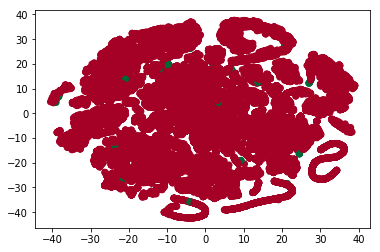

In [22]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_transformed_y[0], tsne_transformed_y[1], c=tsne_transformed_y.Class, cmap = 'RdYlGn')
plt.show()

Задача не кажется линейно разделимой, но для начала все равно стоит попробовать наиболее простой и легкоинтерпретируемый метод.

### LogisticRegression

In [23]:
#Обучим модель на автоматических настройках
logreg = LogisticRegression(penalty = 'l2', random_state = 17)
logreg.fit(X_train, y_train)
#Посмотрим результаты
y_pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred_logreg)) 
print(accuracy_score(y_test, y_pred_logreg))
# Ещё результаты
print("Classification Report для нерегуляризованной модели:")
print(classification_report(y_test,y_pred_logreg))

[[56851    13]
 [   34    64]]
0.9991748885221726
Classification Report для нерегуляризованной модели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
logreg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [25]:
from sklearn.model_selection import GridSearchCV
# Перечень параметров для регуляризации
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.1, 0.5, 1, 5, 10, 25, 50]}
# Подбор параметров
grid_logreg = GridSearchCV(LogisticRegression(random_state = 17), log_reg_params, cv = 5)
grid_logreg.fit(X_train, y_train)
# Выбираем лучшие параметры и закрепляем их 
grid_logreg.best_estimator_

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pred_grid_logreg = grid_logreg.predict(X_test)

In [28]:
print(confusion_matrix(y_test, pred_grid_logreg)) 
print(accuracy_score(y_test, pred_grid_logreg))
# Ещё результаты
print("Classification Report для кросс-валидированной логистической классификации:")
print(classification_report(y_test, pred_grid_logreg))

[[56850    14]
 [   34    64]]
0.9991573329588147
Classification Report для кросс-валидированной логистической классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.65      0.73        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.91      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962



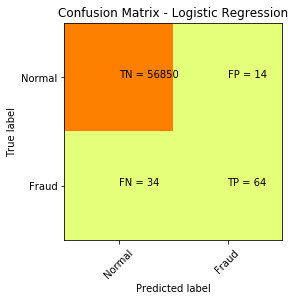

In [29]:
plt.clf()
plt.imshow(confusion_matrix(y_test, pred_grid_logreg), interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix(y_test, pred_grid_logreg)[i][j]))
plt.show()

Выделим важные признаки, на основе которых принимается решение.
Незначащие признаки при этом удалим.

In [30]:
coefs = pd.DataFrame(logreg.coef_).T
coefs.rename(columns = {0: 'coefs'}, inplace = True)

names = pd.DataFrame(data.drop('Class', axis = 1).columns)
names.rename(columns = {0: 'names'}, inplace = True)

In [31]:
importances = pd.concat([coefs, names], axis = 1)

In [32]:
importances.sort_values(by = 'coefs')

,coefs,names
32,-2.178968,Part of day=2
31,-1.752644,Part of day=1
30,-1.600822,Part of day=0
33,-1.524537,Part of day=3
9,-0.753552,V10
26,-0.688374,V27
13,-0.594071,V14
12,-0.457663,V13
19,-0.437499,V20
8,-0.273403,V9


In [33]:
columns = importances['names'][(importances.coefs<-0.15)|(importances.coefs>0.15)]
columns = columns.to_list()

Для более сложных моделей удаление незначащих признаков должно ускорить обучение.

#### Isolation Forest

In [34]:
isforest=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=17, verbose=0)
# Обучаем на отобранных ранее признаках
isforest.fit(X_train[columns], y_train)
pred_isforest = isforest.predict(X_test[columns])

#Isolation Forest возвращает метки -1 и 1, мы их перезапишем в привычный вид
pred_isforest[pred_isforest == 1] = 0
pred_isforest[pred_isforest == -1] = 1

D:\programs\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [35]:
print("Classification Report для Isolation Forest:")
print(classification_report(y_test, pred_isforest))

Classification Report для Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     56864
           1       0.01      0.92      0.03        98

   micro avg       0.88      0.88      0.88     56962
   macro avg       0.51      0.90      0.48     56962
weighted avg       1.00      0.88      0.93     56962



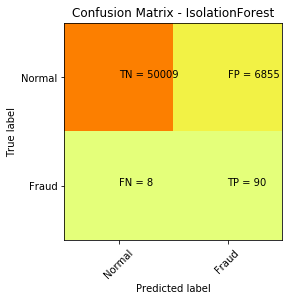

In [36]:
plt.clf()
plt.imshow(confusion_matrix(y_test, pred_isforest), interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - IsolationForest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix(y_test, pred_isforest)[i][j]))
plt.show()

Модель отработала отлично. Из 98 фродовых сделок мы уловили 90. При этом приходится поскупиться больших количеством False Positive меток. Однако, в случае, если стоимость потерь при пропуске фродовой операции значительно превосходит стоимость проверки ложнопозитивной сделки, лучше будет выбрать именно этот вариант.

Нормализация данных

Всем хорошо знакомо, что большинство градиентных методов (на которых по-сути и основаны почти все алгоритмы машинного обучения) сильно чуствительны к шкалированию данных. Поэтому перед запуском алгоритмов чаще всего делается либо нормализация, либо так называемая стандартизация. Нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. 

x_normalized = (x - x.min()) / (x.max() - x.min())

Стандартизация же подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1. 

x_standardized = (x - x.mean())/x.std()


В Scikit-Learn уже есть готовые для этого функции.

**from** sklearn **import** preprocessing

\# normalize the data attributes

normalized_X = preprocessing.normalize(X)

\# standardize the data attributes

standardized_X = preprocessing.scale(X)

In [43]:
# Мне легче прописать их самой, т.к. функции возвращают Numpy.darray() без указания наименований столбцов.
# Стандартизация
X_train_scld = (X_train - X_train.mean()) / (X_train.std()) 
X_test_scld = (X_test - X_test.mean()) / (X_test.std()) 

# Нормализация
X_train_scld = (X_train_scld - X_train_scld.min())/(X_train_scld.max() - X_train_scld.min())
X_test_scld =(X_test_scld - X_test_scld.min())/(X_test_scld.max() - X_test_scld.min())

#### OneClassSVM

In [44]:
X_train_data_scld = pd.concat([X_train_scld[columns], y_train], axis=1)

In [51]:
from sklearn.svm import OneClassSVM 
train_normal = X_train_data_scld[X_train_data_scld['Class']==0] 
train_outliers = X_train_data_scld[X_train_data_scld['Class']==1] 
outlier_prop = len(train_outliers) / len(train_normal) 
svm = OneClassSVM(kernel = 'linear', nu = outlier_prop, random_state = 42) 
svm.fit(X_train_data_scld.drop('Class', axis = 1))

D:\programs\Anaconda\lib\site-packages\sklearn\svm\classes.py:1177: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='linear', max_iter=-1, nu=0.0017322412299792043,
      random_state=42, shrinking=True, tol=0.001, verbose=False)

In [52]:
pred_svm = svm.predict(X_test_scld[columns])

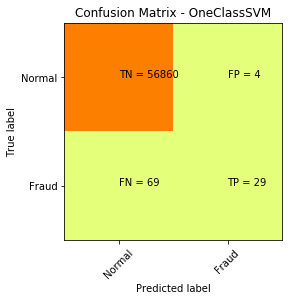

In [53]:
pred_svm = np.array([1 if label == -1 else 0 for label in pred_svm])
plt.clf()
plt.imshow(confusion_matrix(y_test, pred_svm), interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - OneClassSVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix(y_test, pred_svm)[i][j]))
plt.show()

In [54]:
print("Classification Report для One Class SVM:")
print(classification_report(y_test, pred_svm))

Classification Report для One Class SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.30      0.44        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.65      0.72     56962
weighted avg       1.00      1.00      1.00     56962



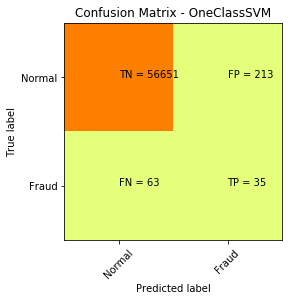

In [42]:
plt.clf()
plt.imshow(confusion_matrix(y_test, pred_svm), interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','Fraud']
plt.title('Confusion Matrix - OneClassSVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix(y_test, pred_svm)[i][j]))
plt.show()